### Load Data and Preview Insurance Fields

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# View relevant columns
df[["claim_date", "claim_amount", "insurance_status"]].head()

,claim_date,claim_amount,insurance_status
0,2025-07-28,37292.72,Uninsured
1,2025-07-24,14631.34,Uninsured
2,2025-08-01,7116.48,Uninsured
3,2025-07-10,14620.71,Private
4,2025-07-24,16889.85,Uninsured


### Convert claim_date to DateTime and Extract Month

In [2]:
# Convert to datetime
df["claim_date"] = pd.to_datetime(df["claim_date"], errors="coerce")

# Drop rows with missing or invalid dates
df = df.dropna(subset=["claim_date"])

# Create Year-Month column
df["month"] = df["claim_date"].dt.to_period("M").astype(str)

### Monthly Claim Amount Trend

In [3]:
# Group by month
monthly_claims = df.groupby("month")["claim_amount"].sum().reset_index()
monthly_claims = monthly_claims.sort_values(by="month")
monthly_claims.head()

,month,claim_amount
0,2025-07,11129709.04
1,2025-08,995337.43


### Plot Monthly Claim Trend (Line Chart)

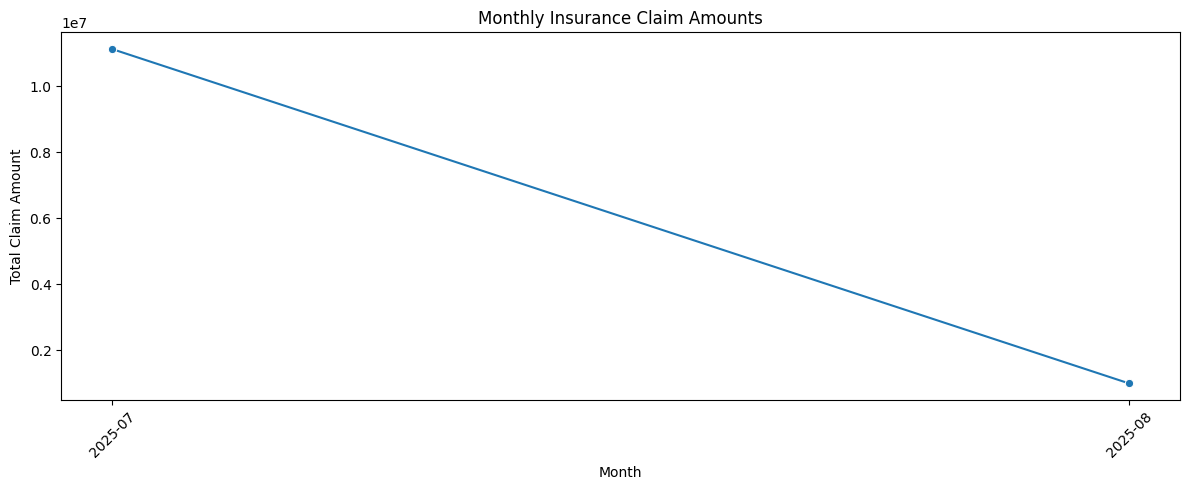

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Save folder
os.makedirs("../visuals/plots", exist_ok=True)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_claims, x="month", y="claim_amount", marker="o")
plt.title("Monthly Insurance Claim Amounts")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/plots/monthly_claim_trend.png")
plt.show()

### Breakdown by Insurance Status

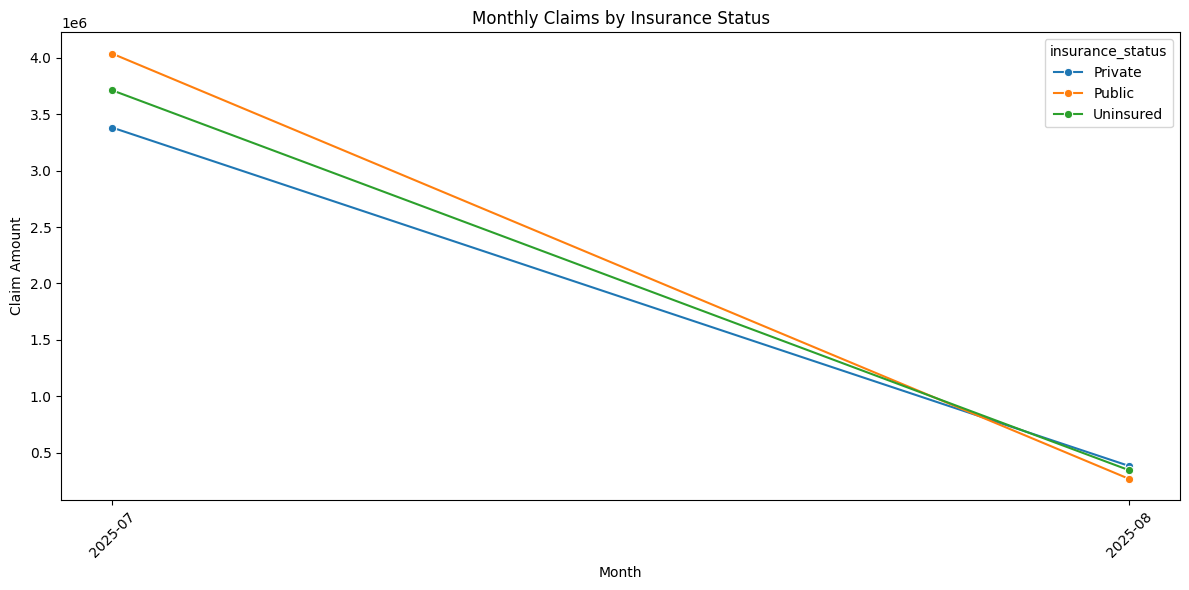

In [5]:
monthly_by_status = (
    df.groupby(["month", "insurance_status"])["claim_amount"].sum().reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_by_status,
    x="month",
    y="claim_amount",
    hue="insurance_status",
    marker="o",
)
plt.title("Monthly Claims by Insurance Status")
plt.xlabel("Month")
plt.ylabel("Claim Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/plots/monthly_claim_by_insurance_status.png")
plt.show()

### Export to CSV for Power BI

In [6]:
# Export summary tables
monthly_claims.to_csv("../data/processed/cleaned/monthly_claim_trends.csv", index=False)
monthly_by_status.to_csv("../data/processed/cleaned/monthly_claim_by_status.csv", index=False)

print("✅ Trend data exported to /data/processed/cleaned")

✅ Trend data exported to /data/processed/cleaned
